# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS
# Optimization: Part Three

This code imports several key Python libraries commonly used for data analysis, optimization, and visualization:

- `import numpy as np`: Imports NumPy, a fundamental library for numerical operations, especially for handling arrays and mathematical computations.
- `import pandas as pd`: Imports pandas, a powerful library for data manipulation and analysis, particularly useful for working with tabular data.
- `import gurobipy as gp` and `from gurobipy import GRB`: Import the Gurobi optimization library. `gurobipy` provides tools for building and solving mathematical optimization models, and `GRB` gives access to Gurobi's set of constants (such as variable types and status codes).
- `from matplotlib import pyplot as plt`: Imports the `pyplot` module from Matplotlib, which is widely used for creating plots and visualizations.

The `# type: ignore` comments are included to suppress type-checking warnings from static analysis tools, which can be useful if type stubs for these libraries are missing. Together, these imports set up the environment for numerical computation, data handling, optimization modeling, and result visualization.

In [1]:
import numpy      as     np            # type: ignore
import pandas     as     pd            # type: ignore
import gurobipy   as     gp            # type: ignore
from   gurobipy   import GRB           # type: ignore
from   matplotlib import pyplot as plt # type: ignore

## Linear model to predict demand
This code defines the coefficients for a linear regression model used to predict demand based on price and seasonality. The variable `intercept` is the baseline value for demand when all other variables are zero. `p_coeff` is the coefficient for the current week's price, indicating that as price increases, demand decreases (since the value is negative). `p1_coeff` and `p2_coeff` are the coefficients for the prices in the previous two weeks, capturing the effect of past prices on current demand.

The dictionary `season_coeff` assigns a specific adjustment to the demand prediction for each season (represented by numbers 1 through 13). Each key corresponds to a season, and the value is the coefficient that will be added to the demand for that season. This allows the model to account for seasonal fluctuations in demand, such as higher demand in certain months or promotional periods. Together, these coefficients enable the construction of a demand prediction formula that incorporates both price history and seasonality.

In [2]:
intercept =  2181
p_coeff   = -2801
p1_coeff  =   929
p2_coeff  =   728
season_coeff = { 1:        0,
                 2: -555.430,
                 3:   81.746,
                 4: -406.774,
                 5:  -26.122,
                 6:   -8.292,
                 7:  -39.334,
                 8:  -81.407,
                 9:  148.728,
                10: 1107.254,
                11: 1125.259,
                12: 1171.240,
                13:  949.056}

$$ \mathrm{demand}_t = \mathrm{intercept} + \mathrm{p_coeff} \cdot p_t + \mathrm{p1_coeff} \cdot p_{t-1} + \mathrm{p2_coeff} \cdot p_{t-2} + \sum{\mathrm{season_coef}_i \cdot \mathrm{season}_i} $$

## Model 1 - Basic price optimization

This code creates a list of consecutive integers representing week numbers. The expression `range(157, 170)` generates a sequence of integers starting at 157 and ending at 169 (the stop value is exclusive). Wrapping this range with `list()` converts the sequence into a list object, so `weeks` becomes `[157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169]`. The second line, `weeks`, simply outputs the list, which is useful for confirming its contents or for use in subsequent code, such as iterating over these week numbers in a loop or as indices in an optimization model.

In [3]:
weeks = list(range(157, 170))
weeks

[157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169]

This code creates a dictionary called `season` that maps each week number in the `weeks` list to a corresponding season index. For each week `w`, the expression `w % 52` calculates the week’s position within a 52-week year (wrapping around after week 51). Dividing this value by 4 and applying `np.ceil` groups the weeks into 13 roughly equal "seasons" (since 52 / 4 = 13). The result is then converted to an integer with `int()`, ensuring the season index is a whole number.

The dictionary comprehension `{w: int(np.ceil(w % 52 / 4)) for w in weeks}` iterates over all week numbers in `weeks`, assigning each week to its calculated season. The final `season` dictionary allows you to quickly look up the season index for any week in your range, which is useful for applying season-specific coefficients in demand prediction or optimization models.

In [4]:
season = {w: int(np.ceil(w % 52 / 4)) for w in weeks}
season

{157: 1,
 158: 1,
 159: 1,
 160: 1,
 161: 2,
 162: 2,
 163: 2,
 164: 2,
 165: 3,
 166: 3,
 167: 3,
 168: 3,
 169: 4}

This code creates a new optimization model using the Gurobi library. The statement `mod1 = gp.Model('price_model_1')` initializes a Gurobi model object named `'price_model_1'` and assigns it to the variable `mod1`. This model will be used to define variables, constraints, and the objective function for an optimization problem—typically, in this context, for price optimization.

The second line, `mod1`, simply outputs the model object. In a Jupyter notebook or interactive environment, this displays a summary or description of the model, which can help confirm that the model was created successfully and is ready for further configuration.

In [5]:
mod1 = gp.Model('price_model_1')
mod1

Restricted license - for non-production use only - expires 2026-11-23


<gurobi.Model Continuous instance price_model_1: 0 constrs, 0 vars, No parameter changes>

This code adds a set of decision variables to the Gurobi model `mod1` using the `addVars` method. The argument `weeks` specifies that one variable will be created for each week in the `weeks` list. The parameter `ub=1` sets an upper bound of 1 for each variable, meaning that the value of each variable cannot exceed 1. By default, these variables are continuous and have a lower bound of 0.

The resulting collection of variables is stored in the dictionary-like object `p`, where each key is a week number and each value is the corresponding Gurobi variable. The second line, `p`, simply outputs this collection, allowing you to inspect the variables that have been added to the model. This setup is commonly used in optimization problems where you need to make a decision (such as setting a price or allocation) for each time period.

In [6]:
p = mod1.addVars(weeks, ub=1)
p

{157: <gurobi.Var *Awaiting Model Update*>,
 158: <gurobi.Var *Awaiting Model Update*>,
 159: <gurobi.Var *Awaiting Model Update*>,
 160: <gurobi.Var *Awaiting Model Update*>,
 161: <gurobi.Var *Awaiting Model Update*>,
 162: <gurobi.Var *Awaiting Model Update*>,
 163: <gurobi.Var *Awaiting Model Update*>,
 164: <gurobi.Var *Awaiting Model Update*>,
 165: <gurobi.Var *Awaiting Model Update*>,
 166: <gurobi.Var *Awaiting Model Update*>,
 167: <gurobi.Var *Awaiting Model Update*>,
 168: <gurobi.Var *Awaiting Model Update*>,
 169: <gurobi.Var *Awaiting Model Update*>}

This code sets the objective function for the Gurobi optimization model `mod1`. The objective is to maximize the total predicted revenue (or another target metric) over a sequence of weeks, taking into account the effects of price and seasonality on demand.

The expression inside `setObjective` calculates the predicted demand for each week using a linear model. For week 157, the demand is computed using the intercept, the price for week 157, and fixed values (1) for the prices in the two previous weeks (since there is no data for weeks before 157). For week 158, the demand uses the price for week 158, the price for week 157, and again a fixed value for the price two weeks prior. For all subsequent weeks (from week 159 onward), the demand is calculated using the current week's price, the prices from the previous two weeks, and the season-specific adjustment.

Each term is multiplied by the corresponding price variable for that week, and the sum of these terms forms the objective function. The `GRB.MAXIMIZE` argument tells Gurobi to maximize this objective. This setup allows the model to find the optimal set of weekly prices that will maximize the predicted outcome, considering both price history and seasonal effects.

In [7]:
mod1.setObjective(
      p[157] * (intercept + p_coeff*p[157] + p1_coeff*1      + p2_coeff*1      + season_coeff[season[157]]) +
      p[158] * (intercept + p_coeff*p[158] + p1_coeff*p[157] + p2_coeff*1      + season_coeff[season[158]]) +
    sum(p[w] * (intercept + p_coeff*p[w]   + p1_coeff*p[w-1] + p2_coeff*p[w-2] + season_coeff[season[w]]) for w in weeks[2:]),
    GRB.MAXIMIZE)

In [8]:
mod1.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.5.0 24F74)

CPU model: Apple M4 Max
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 0 rows, 13 columns and 0 nonzeros
Model fingerprint: 0x7ae80c7d
Model has 36 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [2e+03, 4e+03]
  QObjective range [1e+03, 6e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 13 columns, 0 nonzeros
Presolved model has 36 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 12
 AA' NZ     : 6.600e+01
 Factor NZ  : 7.800e+01
 Factor Ops : 6.500e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.32380362e+08  1.75513527e+08  9.99e+02 3.08e+02  1.00e+06     

The variable `p` is a collection of decision variables created using Gurobi's `addVars` method. In this context, `p` is typically a dictionary-like object where each key corresponds to a week number and each value is a Gurobi variable representing the price (or another decision variable) for that week. By evaluating or displaying `p`, you can inspect the set of variables that have been added to the optimization model. This is useful for confirming that the variables were created as expected and for referencing them in constraints or the objective function elsewhere in your code.

In [9]:
p

{157: <gurobi.Var C0 (value 0.9621363051399718)>,
 158: <gurobi.Var C1 (value 0.9480218163490661)>,
 159: <gurobi.Var C2 (value 0.9219441427475347)>,
 160: <gurobi.Var C3 (value 0.8949278599275816)>,
 161: <gurobi.Var C4 (value 0.7846093528798059)>,
 162: <gurobi.Var C5 (value 0.7648870765280024)>,
 163: <gurobi.Var C6 (value 0.7646540974597961)>,
 164: <gurobi.Var C7 (value 0.7809810100556894)>,
 165: <gurobi.Var C8 (value 0.8938395503299117)>,
 166: <gurobi.Var C9 (value 0.8954769613002364)>,
 167: <gurobi.Var C10 (value 0.8659965970583492)>,
 168: <gurobi.Var C11 (value 0.7558708530395326)>,
 169: <gurobi.Var C12 (value 0.554601132654731)>}

This code visualizes the optimized weekly prices obtained from the Gurobi model. First, it creates a list called `prices` by extracting the optimized value (`.x`) of each price decision variable `p[w]` for every week in the `weeks` list. This results in a sequence of price values corresponding to each week.

The next two lines plot these prices: `plt.plot(weeks, prices)` draws a line plot showing how the price changes over the weeks, while `plt.scatter(weeks, prices)` overlays individual data points for each week, making it easier to see the exact values. The following lines label the x-axis as "Week number" and the y-axis as "Price ($)" for clarity. Finally, `plt.show()` displays the plot. This visualization helps you quickly interpret the pricing strategy determined by the optimization model across the selected time period.

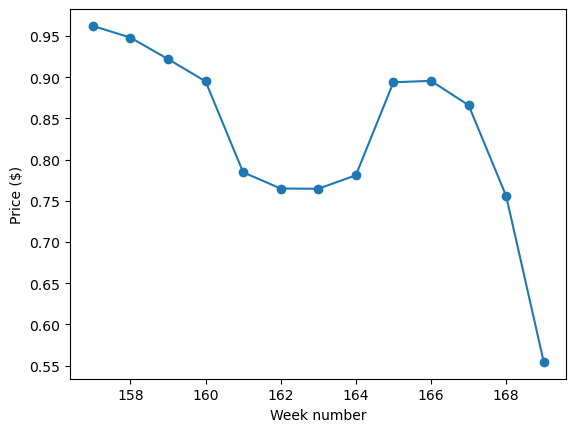

In [10]:
prices = [p[w].x for w in weeks]
plt.plot(weeks, prices)
plt.scatter(weeks, prices)
plt.xlabel('Week number')
plt.ylabel('Price ($)')
plt.show()

## Model 2 - Adding a price ladder constraint
The decision variables (weekly prices) can only take values from a limited set of possibilities.

This code sets up the second optimization model, `mod2`, for price optimization with a price ladder constraint. The list `p_ladder` defines the set of allowable prices: 1.0, 0.9, 0.8, and 0.7. The model `mod2` is created using Gurobi's `Model` class.

The variable `p` is a set of decision variables, one for each week in the `weeks` list, representing the price chosen for that week. The variable `x` is a set of binary decision variables indexed by both week and price ladder value; `x[w, k]` is 1 if price `k` is selected for week `w`, and 0 otherwise.

The objective function, set with `mod2.setObjective`, is the same as in the previous model: it maximizes the total predicted revenue (or another target metric) over all weeks, using a linear demand model that incorporates the effects of current and past prices as well as seasonality. The use of the price ladder and binary variables allows the model to later enforce constraints that restrict weekly prices to the specified ladder values.

In [11]:
p_ladder = [1.0, 0.9, 0.8, 0.7]
mod2     = gp.Model('price_model_2')
p        = mod2.addVars(weeks) # No need to set the upper bound as it will be added later as a contraint.
x        = mod2.addVars(weeks, p_ladder, vtype=GRB.BINARY)
mod2.setObjective(
      p[157] * (intercept + p_coeff*p[157] + p1_coeff*1      + p2_coeff*1      + season_coeff[season[157]]) +
      p[158] * (intercept + p_coeff*p[158] + p1_coeff*p[157] + p2_coeff*1      + season_coeff[season[158]]) +
    sum(p[w] * (intercept + p_coeff*p[w]   + p1_coeff*p[w-1] + p2_coeff*p[w-2] + season_coeff[season[w]]) for w in weeks[2:]),
    GRB.MAXIMIZE)

The variable `x` is a collection of binary decision variables created using Gurobi's `addVars` method. In this context, `x` is indexed by both week and price ladder value, so each `x[w, k]` represents whether price `k` is selected for week `w` (1 if selected, 0 otherwise). Displaying `x` allows you to inspect these variables, which are essential for enforcing constraints that ensure only one price from the ladder is chosen per week and for modeling price selection in the optimization problem.

In [12]:
x

{(157, 1.0): <gurobi.Var *Awaiting Model Update*>,
 (157, 0.9): <gurobi.Var *Awaiting Model Update*>,
 (157, 0.8): <gurobi.Var *Awaiting Model Update*>,
 (157, 0.7): <gurobi.Var *Awaiting Model Update*>,
 (158, 1.0): <gurobi.Var *Awaiting Model Update*>,
 (158, 0.9): <gurobi.Var *Awaiting Model Update*>,
 (158, 0.8): <gurobi.Var *Awaiting Model Update*>,
 (158, 0.7): <gurobi.Var *Awaiting Model Update*>,
 (159, 1.0): <gurobi.Var *Awaiting Model Update*>,
 (159, 0.9): <gurobi.Var *Awaiting Model Update*>,
 (159, 0.8): <gurobi.Var *Awaiting Model Update*>,
 (159, 0.7): <gurobi.Var *Awaiting Model Update*>,
 (160, 1.0): <gurobi.Var *Awaiting Model Update*>,
 (160, 0.9): <gurobi.Var *Awaiting Model Update*>,
 (160, 0.8): <gurobi.Var *Awaiting Model Update*>,
 (160, 0.7): <gurobi.Var *Awaiting Model Update*>,
 (161, 1.0): <gurobi.Var *Awaiting Model Update*>,
 (161, 0.9): <gurobi.Var *Awaiting Model Update*>,
 (161, 0.8): <gurobi.Var *Awaiting Model Update*>,
 (161, 0.7): <gurobi.Var *Await

These two lines add important constraints to the Gurobi optimization model `mod2` to ensure the correct use of the price ladder.

The first line, `constr_select_ladder`, enforces that for each week, exactly one price from the ladder is selected. It does this by summing the binary variables `x[w, k]` across all possible prices `k` in `p_ladder` for each week `w`, and requiring that this sum equals 1. This guarantees that only one price option is chosen per week.

The second line, `constr_select_price`, links the continuous price variable `p[w]` for each week to the selected price from the ladder. It sets `p[w]` equal to the sum of each possible price `k` multiplied by its corresponding binary variable `x[w, k]`. Since only one `x[w, k]` can be 1 (from the previous constraint), this ensures that `p[w]` takes on the value of the selected price from the ladder for that week. Together, these constraints ensure that weekly prices are chosen from the allowed set and are properly reflected in the model's variables.

In [13]:
constr_select_ladder = mod2.addConstrs(sum(x[w, k] for k in p_ladder) == 1 for w in weeks)
constr_select_price  = mod2.addConstrs(p[w] == sum(k * x[w, k] for k in p_ladder) for w in weeks)

The line `mod2.optimize()` calls the `optimize` method on the Gurobi model object `mod2`. This method triggers the optimization process, where Gurobi attempts to find the best solution to the mathematical model defined by your variables, objective function, and constraints. During this process, Gurobi uses advanced algorithms to search for the set of variable values (such as weekly prices) that maximize (or minimize) the objective, while satisfying all constraints. After this call, the model's variables (like `p` and `x`) will contain their optimized values, which you can then access and analyze.

In [14]:
mod2.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.5.0 24F74)

CPU model: Apple M4 Max
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 26 rows, 65 columns and 117 nonzeros
Model fingerprint: 0x5eb5a9f6
Model has 36 quadratic objective terms
Variable types: 13 continuous, 52 integer (52 binary)
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [2e+03, 4e+03]
  QObjective range [1e+03, 6e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 11514.818400
Presolve removed 0 rows and 13 columns
Presolve time: 0.00s
Presolved: 26 rows, 52 columns, 91 nonzeros
Presolved model has 36 quadratic objective terms
Variable types: 13 continuous, 39 integer (39 binary)

Root relaxation: objective 1.201770e+04, 37 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  O

This code block visualizes the optimized prices for each week as determined by the Gurobi optimization model. The first line creates a list called `prices` by extracting the optimized value (`.x`) from each price decision variable `p[w]` for every week in the `weeks` list. This results in a sequence of price values, one for each week.

The next two lines use Matplotlib's plotting functions to display these prices. `plt.plot(weeks, prices)` draws a line plot, showing how the price changes over the sequence of weeks, providing a clear view of trends or patterns. `plt.scatter(weeks, prices)` overlays individual data points on the same plot, making it easier to see the exact price chosen for each week.

The following two lines label the axes for clarity: the x-axis is labeled "Week number" and the y-axis is labeled "Price ($)". Finally, `plt.show()` displays the plot in the output pane or notebook cell. This visualization helps you quickly interpret the pricing strategy produced by the optimization model, making it easier to analyze and communicate the results.

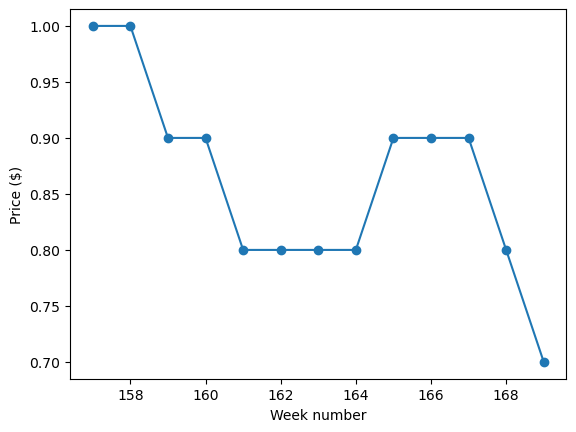

In [15]:
prices = [p[w].x for w in weeks]
plt.plot(weeks, prices)
plt.scatter(weeks, prices)
plt.xlabel('Week number')
plt.ylabel('Price ($)')
plt.show()

## Model 3 - Make at most 4 promotions
This code sets up a third Gurobi optimization model, `mod3`, to optimize weekly prices with additional constraints. The model is initialized with `gp.Model('price_model_3')`. The variable `p` is created as a set of decision variables, one for each week in the `weeks` list, representing the price for that week. The variable `x` is a set of binary decision variables indexed by both week and price ladder value (`p_ladder`), where `x[w, k]` is 1 if price `k` is selected for week `w`, and 0 otherwise.

The objective function, defined with `setObjective`, aims to maximize total predicted revenue across all weeks. It uses a linear demand model that incorporates the effects of current and past prices, as well as seasonality. The first two weeks are handled separately due to lack of historical price data, while the rest use the full model.

Two key constraints are added. The first, `constr_select_ladder`, ensures that exactly one price from the ladder is chosen for each week by requiring the sum of `x[w, k]` over all `k` for each week `w` to be 1. The second, `constr_select_price`, links the continuous price variable `p[w]` to the selected price from the ladder, ensuring that `p[w]` equals the value of the chosen price for that week. Together, these constraints ensure that weekly prices are selected from the allowed set and are properly reflected in the model.

In [16]:
mod3 = gp.Model('price_model_3')
p = mod3.addVars(weeks)
x = mod3.addVars(weeks, p_ladder, vtype= GRB.BINARY)
obj_fn = mod3.setObjective(
      p[157] * (intercept + p_coeff*p[157] + p1_coeff*1      + p2_coeff*1      + season_coeff[season[157]]) +
      p[158] * (intercept + p_coeff*p[158] + p1_coeff*p[157] + p2_coeff*1      + season_coeff[season[158]]) +
    sum(p[w] * (intercept + p_coeff*p[w]   + p1_coeff*p[w-1] + p2_coeff*p[w-2] + season_coeff[season[w]]) for w in weeks[2:]),
    GRB.MAXIMIZE)
constr_select_ladder = mod3.addConstrs(sum(x[w, k] for k in p_ladder) == 1 for w in weeks)
constr_select_price = mod3.addConstrs(p[w] == sum(k * x[w, k] for k in p_ladder) for w in weeks)

This line adds a constraint to the Gurobi optimization model `mod3` that limits the total number of promotions allowed across all weeks. Here, a "promotion" is defined as selecting any price from the price ladder except the first (typically the regular price), which is why the code uses `p_ladder[1:]` to exclude the first price.

The expression `sum(x[w, k] for k in p_ladder[1:] for w in weeks)` counts the total number of weeks in which a promotional price is chosen. The constraint `<= 4` ensures that at most four promotions can occur throughout the entire planning period. This is useful for scenarios where the business wants to restrict the frequency of discounted pricing events. The constraint is added to the model using `addConstr`, and the resulting constraint object is stored in `constr_4_promo`.

In [17]:
constr_4_promo = mod3.addConstr(sum(x[w, k] for k in p_ladder[1:] for w in weeks) <= 4)

The line `mod3.optimize()` starts the optimization process for the Gurobi model `mod3`. When this method is called, Gurobi analyzes the model—including all variables, constraints, and the objective function—to find the best possible solution that maximizes (or minimizes) the objective while satisfying all constraints. After this call, the decision variables in `mod3` (such as `p` and `x`) will be assigned their optimal values, which you can then access for further analysis or visualization. This step is essential to actually solve the mathematical programming problem you have defined.

In [18]:
mod3.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.5.0 24F74)

CPU model: Apple M4 Max
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 27 rows, 65 columns and 156 nonzeros
Model fingerprint: 0x8356128d
Model has 36 quadratic objective terms
Variable types: 13 continuous, 52 integer (52 binary)
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [2e+03, 4e+03]
  QObjective range [1e+03, 6e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 10890.440000
Presolve time: 0.00s
Presolved: 27 rows, 65 columns, 143 nonzeros
Presolved model has 36 quadratic objective terms
Variable types: 13 continuous, 52 integer (52 binary)

Root relaxation: objective 1.194927e+04, 65 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd

This code block visualizes the optimized weekly prices produced by the Gurobi optimization model. The first line constructs a list called `prices` by extracting the optimized value (`.x`) from each price decision variable `p[w]` for every week in the `weeks` list. This results in a sequence of price values, one for each week, reflecting the solution found by the optimizer.

The next two lines use Matplotlib's plotting functions to display these prices. `plt.plot(weeks, prices)` draws a line plot, showing how the price changes over the sequence of weeks, which helps reveal trends or patterns in the pricing strategy. `plt.scatter(weeks, prices)` overlays individual data points on the same plot, making it easier to see the exact price chosen for each week.

The following two lines label the axes for clarity: the x-axis is labeled "Week number" and the y-axis is labeled "Price ($)", which helps viewers interpret the plot. Finally, `plt.show()` displays the plot in the output pane or notebook cell. This visualization provides a clear and immediate way to interpret and communicate the results of the optimization, making it easier to analyze the pricing strategy over time.

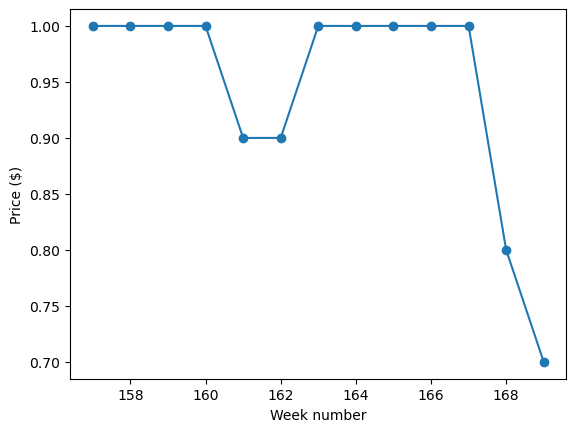

In [19]:
prices = [p[w].x for w in weeks]
plt.plot(weeks, prices)
plt.scatter(weeks, prices)
plt.xlabel('Week number')
plt.ylabel('Price ($)')
plt.show()

## Model 4 - Do not allow consecutive promotions

This code sets up a Gurobi optimization model called `mod4` to determine optimal weekly prices under several business constraints. The model is initialized with `gp.Model('price_model_4')`. The variable `p` is a set of decision variables representing the price for each week in the planning period, while `x` is a set of binary variables indicating which price from the allowed price ladder (`p_ladder`) is chosen for each week.

The objective function, defined with `setObjective`, aims to maximize total predicted revenue over all weeks. It uses a linear demand model that incorporates the effects of the current price, prices from the previous two weeks, and seasonality. The first two weeks are handled separately due to missing historical price data, while the rest use the full model.

Three main constraints are added to the model. The first, `constr_select_ladder`, ensures that exactly one price from the ladder is selected for each week by requiring the sum of the binary variables `x[w, k]` over all possible prices `k` to be 1 for each week. The second, `constr_select_price`, links the continuous price variable `p[w]` to the selected price from the ladder, ensuring that `p[w]` equals the value of the chosen price for that week. The third constraint, `constr_4_promo`, limits the total number of promotions (weeks where a discounted price is chosen) to at most four by summing the binary variables for all promotional prices (excluding the regular price) across all weeks and requiring this sum to be less than or equal to four. Together, these constraints ensure that the model selects valid prices, enforces business rules, and seeks to maximize revenue.

In [20]:
mod4   = gp.Model('price_model_4')
p      = mod4.addVars(weeks)
x      = mod4.addVars(weeks, p_ladder, vtype=GRB.BINARY)
obj_fn = mod4.setObjective(
      p[157] * (intercept + p_coeff*p[157] + p1_coeff*1      + p2_coeff*1      + season_coeff[season[157]]) +
      p[158] * (intercept + p_coeff*p[158] + p1_coeff*p[157] + p2_coeff*1      + season_coeff[season[158]]) +
    sum(p[w] * (intercept + p_coeff*p[w]   + p1_coeff*p[w-1] + p2_coeff*p[w-2] + season_coeff[season[w]]) for w in weeks[2:]),
    GRB.MAXIMIZE)
constr_select_ladder = mod4.addConstrs(sum(x[w, k] for k in p_ladder) == 1 for w in weeks)
constr_select_price = mod4.addConstrs(p[w] == sum(k * x[w, k] for k in p_ladder) for w in weeks)
constr_4_promo = mod4.addConstr(sum(x[w, k] for k in p_ladder[1:] for w in weeks) <= 4)

This line adds a set of constraints to the Gurobi optimization model `mod4` to prevent consecutive promotions across the planning horizon. Here, a "promotion" is defined as selecting any price from the price ladder except the first (regular price), so `p_ladder[1:]` represents all promotional prices.

For each week `w` (except the last week), the constraint sums the binary variables `x[w, k]` for all promotional prices in week `w` and week `w + 1`. The sum is constrained to be less than or equal to 1, meaning that at most one of these two consecutive weeks can have a promotional price. This effectively ensures that promotions cannot occur in back-to-back weeks.

The `addConstrs` method applies this constraint for every pair of consecutive weeks in `weeks[:-1]`, storing the resulting constraint objects in `constr_no_consec_promo`. This approach enforces a business rule that avoids clustering promotions together, which can help maintain the perceived value of promotions and prevent customer habituation to discounts.

In [21]:
constr_no_consec_promo = mod4.addConstrs((sum(x[w    , k] for k in p_ladder[1:]) +
                                          sum(x[w + 1, k] for k in p_ladder[1:]) <= 1) for w in weeks[:-1])

The line `mod4.optimize()` initiates the optimization process for the Gurobi model instance `mod4`. When this method is called, Gurobi processes all the variables, constraints, and the objective function that have been defined for the model. It then uses mathematical optimization algorithms to search for the best solution that maximizes (or minimizes) the objective, while ensuring all constraints are satisfied. After this call, the model's decision variables (such as `p` and `x`) will be assigned their optimal values, which you can then access for analysis or visualization. This step is essential to actually solve the optimization problem you have constructed.

In [22]:
mod4.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.5.0 24F74)

CPU model: Apple M4 Max
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 39 rows, 65 columns and 228 nonzeros
Model fingerprint: 0xf7b2a2b1
Model has 36 quadratic objective terms
Variable types: 13 continuous, 52 integer (52 binary)
Coefficient statistics:
  Matrix range     [7e-01, 1e+00]
  Objective range  [2e+03, 4e+03]
  QObjective range [1e+03, 6e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 11126.462000
Presolve time: 0.00s
Presolved: 39 rows, 65 columns, 215 nonzeros
Presolved model has 36 quadratic objective terms
Variable types: 13 continuous, 52 integer (52 binary)

Root relaxation: objective 1.187440e+04, 73 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd

This code block visualizes the optimized prices for each week as determined by the optimization model. The first line creates a list called `prices` by extracting the optimized value (`.x`) from each price decision variable `p[w]` for every week in the `weeks` list. This results in a sequence of price values, one for each week, reflecting the solution found by the optimizer.

The next two lines use Matplotlib's plotting functions to display these prices. `plt.plot(weeks, prices)` draws a line plot, showing how the price changes over the sequence of weeks, which helps reveal trends or patterns in the pricing strategy. `plt.scatter(weeks, prices)` overlays individual data points on the same plot, making it easier to see the exact price chosen for each week.

The following two lines label the axes for clarity: the x-axis is labeled "Week number" and the y-axis is labeled "Price ($)", which helps viewers interpret the plot. Finally, `plt.show()` displays the plot in the output pane or notebook cell. This visualization provides a clear and immediate way to interpret and communicate the results of the optimization, making it easier to analyze the pricing strategy over time.

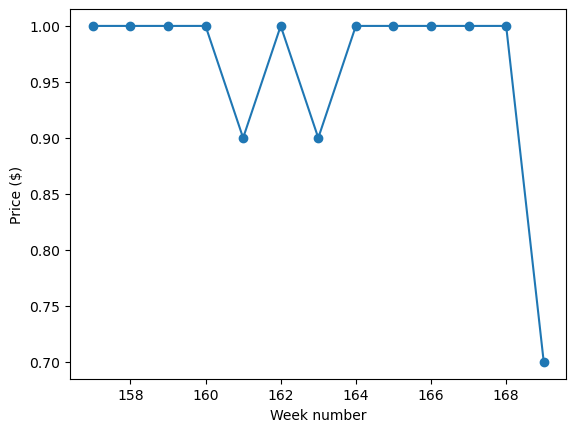

In [23]:
prices = [p[w].x for w in weeks]
plt.plot(weeks, prices)
plt.scatter(weeks, prices)
plt.xlabel('Week number')
plt.ylabel('Price ($)')
plt.show()